In [57]:
import pandas as pd
import numpy as np

import io
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

import pypfopt as pt
from beeprint import pp

In [3]:
df = pd.read_excel('4_portfolios_sorted_by_size_and_illiquidity_2x2.xls')
#df = pd.read_excel('7_portfolios_sorted_by_industry.xls')

In [4]:
df.year = df.year.astype('str')
df.month = df.month.astype('str')
df.day = df.day.astype('str')

In [5]:
df['data'] = df['year']+'-'+df['month']+'-'+df['day']

In [6]:
df['data'] = pd.to_datetime(df['data'])

In [7]:
df.set_index('data',inplace=True)

In [8]:
df.drop(['year','month','day'],axis=1,inplace=True)

In [9]:
df

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2
data,,,,
2001-01-02,0.249266,0.011374,-0.006851,0.002792
2001-01-03,0.038109,0.089353,0.078678,0.063380
2001-01-04,0.001835,-0.005483,0.002131,-0.017793
2001-01-05,-0.002896,0.002998,-0.019888,-0.015397
2001-01-08,0.013769,0.004072,0.004629,0.004749
...,...,...,...,...
2022-06-24,-0.000810,-0.002672,0.002274,-0.005679
2022-06-27,-0.014636,0.005477,0.009685,0.009564
2022-06-28,-0.022634,-0.020941,-0.005422,-0.012261


In [10]:
retorno_cripto = pd.read_csv('retornos_cripto.csv')


In [11]:
retorno_cripto.set_index('Date',inplace=True)
retorno_cripto.index = pd.to_datetime(retorno_cripto.index)

In [12]:
df = pd.concat([df, retorno_cripto], axis=1)

In [13]:
type(retorno_cripto.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [15]:
df = df.dropna()

In [16]:
df

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2,Bitcoin,Ethereum,Litecoin
2016-08-25,-0.002560,-0.006534,0.000523,-0.000906,0.000468,0.040878,-0.004429
2016-08-26,0.005114,0.002618,0.001137,-0.005101,0.011342,-0.006160,0.008898
2016-08-29,0.012452,0.008877,0.014567,0.007465,-0.019809,-0.036497,-0.021316
2016-08-30,-0.008169,-0.003451,0.000134,0.002454,0.009165,0.036807,0.014396
2016-08-31,-0.003290,0.000339,-0.007591,-0.003717,-0.010397,0.025444,-0.022824
...,...,...,...,...,...,...,...
2022-06-24,-0.000810,-0.002672,0.002274,-0.005679,0.006192,0.070877,0.002184
2022-06-27,-0.014636,0.005477,0.009685,0.009564,-0.024350,-0.028855,-0.001152
2022-06-28,-0.022634,-0.020941,-0.005422,-0.012261,-0.016042,-0.033690,-0.050323
2022-06-29,-0.022535,-0.017098,-0.009615,-0.004911,-0.024357,-0.054502,0.001090


# Grafico de Retornos

<AxesSubplot:>

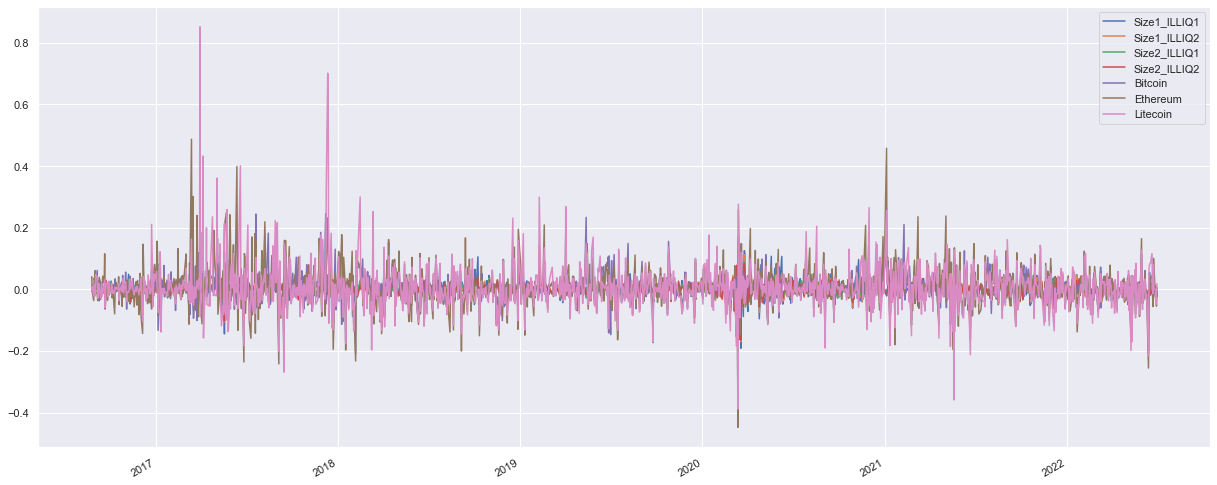

In [17]:
sns.set()
df.plot(figsize=(21,9))


In [18]:
retorno = df

In [19]:
retorno_anual = retorno.mean() * 264

In [21]:
retorno

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2,Bitcoin,Ethereum,Litecoin
2016-08-25,-0.002560,-0.006534,0.000523,-0.000906,0.000468,0.040878,-0.004429
2016-08-26,0.005114,0.002618,0.001137,-0.005101,0.011342,-0.006160,0.008898
2016-08-29,0.012452,0.008877,0.014567,0.007465,-0.019809,-0.036497,-0.021316
2016-08-30,-0.008169,-0.003451,0.000134,0.002454,0.009165,0.036807,0.014396
2016-08-31,-0.003290,0.000339,-0.007591,-0.003717,-0.010397,0.025444,-0.022824
...,...,...,...,...,...,...,...
2022-06-24,-0.000810,-0.002672,0.002274,-0.005679,0.006192,0.070877,0.002184
2022-06-27,-0.014636,0.005477,0.009685,0.009564,-0.024350,-0.028855,-0.001152
2022-06-28,-0.022634,-0.020941,-0.005422,-0.012261,-0.016042,-0.033690,-0.050323
2022-06-29,-0.022535,-0.017098,-0.009615,-0.004911,-0.024357,-0.054502,0.001090


# Retorno Anual

In [22]:
retorno_anual

Size1_ILLIQ1    0.226102
Size1_ILLIQ2    0.173790
Size2_ILLIQ1    0.132287
Size2_ILLIQ2    0.254821
Bitcoin         1.039780
Ethereum        1.465618
Litecoin        1.223179
dtype: float64

# Matriz de Covariância

In [23]:
cov = retorno.cov() * 264
cov

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2,Bitcoin,Ethereum,Litecoin
Size1_ILLIQ1,0.133905,0.095839,0.084405,0.086135,0.016397,0.030973,0.026797
Size1_ILLIQ2,0.095839,0.086670,0.069724,0.075459,0.015436,0.027524,0.023398
Size2_ILLIQ1,0.084405,0.069724,0.069126,0.067320,0.019255,0.032089,0.029655
Size2_ILLIQ2,0.086135,0.075459,0.067320,0.093038,0.027497,0.035891,0.027508
Bitcoin,0.016397,0.015436,0.019255,0.027497,0.618383,0.565568,0.590692
Ethereum,0.030973,0.027524,0.032089,0.035891,0.565568,1.168707,0.806192
Litecoin,0.026797,0.023398,0.029655,0.027508,0.590692,0.806192,1.458628


# Matriz de Correlação

In [24]:
corr = retorno.corr()
corr

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2,Bitcoin,Ethereum,Litecoin
Size1_ILLIQ1,1.000000,0.889632,0.877307,0.771702,0.056981,0.078294,0.060634
Size1_ILLIQ2,0.889632,1.000000,0.900793,0.840324,0.066677,0.086480,0.065806
Size2_ILLIQ1,0.877307,0.900793,1.000000,0.839446,0.093130,0.112898,0.093392
Size2_ILLIQ2,0.771702,0.840324,0.839446,1.000000,0.114638,0.108844,0.074671
Bitcoin,0.056981,0.066677,0.093130,0.114638,1.000000,0.665278,0.621956
Ethereum,0.078294,0.086480,0.112898,0.108844,0.665278,1.000000,0.617466
Litecoin,0.060634,0.065806,0.093392,0.074671,0.621956,0.617466,1.000000


In [25]:
num_acoes = len(list(df))
num_carteiras = 1000
peso = np.random.random(num_acoes)
peso /= np.sum(peso)

In [26]:
retorno_esperado = np.dot(peso,retorno_anual)

In [27]:
peso

array([0.12920214, 0.10816526, 0.17720062, 0.10803474, 0.18000365,
       0.15820079, 0.13919281])

In [28]:
retorno_esperado

0.688265695031384

In [29]:
df[(df.index >= '2021-01-01') & (df.index <= '2021-12-31')]

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2,Bitcoin,Ethereum,Litecoin
2021-01-04,-0.021749,-0.006435,-0.005028,-0.013776,0.112279,0.457965,0.255689
2021-01-05,0.000118,-0.007165,-0.001001,-0.009487,0.059200,0.052526,0.016545
2021-01-06,-0.017431,-0.017725,-0.013795,-0.006160,0.088260,0.104375,0.070958
2021-01-07,-0.004793,-0.007405,0.011685,0.043090,0.091902,0.032080,0.022731
2021-01-08,0.025868,0.032018,0.034293,0.064044,0.030331,-0.005627,0.017006
...,...,...,...,...,...,...,...
2021-12-23,-0.009015,-0.002080,-0.003977,-0.000038,0.049158,0.036636,0.056013
2021-12-27,0.011151,0.015748,0.008268,0.004900,-0.010934,-0.010581,-0.040226
2021-12-28,0.022299,0.012148,-0.002531,0.001334,-0.061254,-0.060021,-0.064862
2021-12-29,-0.022277,-0.008498,-0.009640,-0.007139,-0.009784,-0.030456,0.011221


In [30]:

lista_stats = list()
for i in list(df):
    d = df[i].describe()
    d = d.to_dict()
    d.update({'curtose':df[i].skew(),
              'assimetria':df[i].kurtosis()})
    
    #s = pd.DataFrame(d,index=[i]).T
    lista_stats.append(d)
    
    

rename = {idx:i for idx,i in enumerate(list(df))}

stats = pd.DataFrame(lista_stats).T   
stats.rename(columns=rename, inplace = True)

# Describle dados das carteiras

In [31]:
stats

,Size1_ILLIQ1,Size1_ILLIQ2,Size2_ILLIQ1,Size2_ILLIQ2,Bitcoin,Ethereum,Litecoin
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,0.000856,0.000658,0.000501,0.000965,0.003939,0.005552,0.004633
std,0.022521,0.018119,0.016181,0.018773,0.048398,0.066535,0.074331
min,-0.207237,-0.169687,-0.150378,-0.200426,-0.394797,-0.448190,-0.388409
25%,-0.008998,-0.007020,-0.006950,-0.007574,-0.018620,-0.027139,-0.029255
50%,0.001141,0.001734,0.001184,0.001241,0.002898,0.001096,0.000765
75%,0.011333,0.009517,0.008994,0.010171,0.025819,0.036256,0.030844
max,0.125304,0.112559,0.129528,0.163470,0.246343,0.487029,0.852292
curtose,-1.029970,-1.563342,-1.104761,-1.501068,-0.111242,0.619268,2.396700
assimetria,14.484155,16.162681,16.236123,23.603563,5.780440,7.094624,23.003863


# Matriz de Correlação

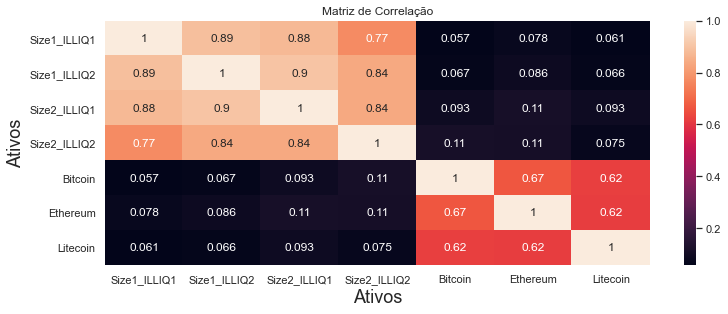

In [32]:
correlation_mat = df.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de Correlação')
plt.xlabel('Ativos',fontsize=18)
plt.ylabel('Ativos',fontsize=18)
plt.show()

In [58]:


img_buf = io.BytesIO()
plt.savefig(img_buf, format='png')

im = Image.open(img_buf)
im.show(title="Matriz de Correlação")


<Figure size 432x288 with 0 Axes>

In [33]:
#Ultimo dia de cada mês para criação dos periodos

def UltimoDiaMes(data):
    
    #data = datetime.datetime.strptime(data, '%Y-%m-%d')
    
    date = datetime.datetime(data.year,data.month, data.day)
    nxt_mnth = date.replace(day=28) + datetime.timedelta(days=4)        
    res = nxt_mnth - datetime.timedelta(days=nxt_mnth.day)
    
    return res

In [34]:
def RangeDate(inicio, fim):
    data_inicio = datetime.datetime.strptime(inicio, '%Y-%m-%d')
    data_fim = datetime.datetime.strptime(fim, '%Y-%m-%d')

    delta = data_fim - data_inicio

    lista_datas = []
    for i in range(delta.days + 1):
        day = data_inicio + timedelta(days=i)
        lista_datas.append(day)
        
    d_l = pd.DataFrame(lista_datas,columns=['data'])
    lista = list(d_l.data[d_l['data'].dt.day == 1])
    
    return lista

In [35]:
#Carteira ingênua

def pesosPortafolioIngenuo(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal


In [36]:

def CriaListaPeriodoTestes(inicio,fim):

    a = RangeDate(inicio,fim)
    lista_datas = list()
    for i in a:
        d = {
            'inicio':i,
            'fim':UltimoDiaMes(i)
        }
        lista_datas.append(d)
    return lista_datas

In [37]:
#Carteira de Minima Variância
def MinVarPesos(retornos, df_cov,restricao):
    ef = pt.EfficientFrontier(retornos, df_cov, weight_bounds=(restricao,1))
    weights = ef.min_volatility() 
    cleaned_weights = ef.clean_weights() 
    #print(cleaned_weights)
    #print('-----------MinVar--------')
    relat = ef.portfolio_performance()
    return relat, cleaned_weights

In [38]:
#Carteira Maior Indice Sharpe
def MaxSharpRatio(retornos, df_cov, restricao):
    ef = pt.EfficientFrontier(retornos, df_cov,weight_bounds=(restricao,1))
    weights = ef.max_sharpe() 
    cleaned_weights = ef.clean_weights() 
    #print(cleaned_weights) 
    #print('------------Tang---------')
    relat = ef.portfolio_performance(verbose=False)
    return relat, cleaned_weights

In [39]:
#Funções Basicas

def Volatilidade(pesos,cov):
    volatilidade = np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
    return volatilidade

def RetornoEsperado(pesos,retorno_anual):
    retorno_esperado = np.dot(pesos,retorno_anual)
    return retorno_esperado

def ConvertDictArray(dicionario):
    nova_lista = [dicionario[i] for i in dicionario]
    lista = np.asarray(nova_lista)
    return lista


In [40]:
#Função para formação de carteiras

def Carteiras(df,data_inicio, data_fim):
    if len(data_inicio)>0:
        df = df[(df.index >= data_inicio) & (df.index <= data_fim)]
    
    retorno = df
    retorno_anual = retorno.mean() * 264
    cov = retorno.cov() * 264
    corr = retorno.corr()
    
    pesos = pesosPortafolioIngenuo(df)
    retorno_esperado = RetornoEsperado(pesos,retorno_anual) #np.dot(pesos,retorno_anual)
    
    volatilidade = Volatilidade(pesos,cov) #np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
    
    cart_min_var = MinVarPesos(retorno_anual,cov,0)
    cart_tang_var = MaxSharpRatio(retorno_anual,cov,0)
    
    cart_min_var_sr = MinVarPesos(retorno_anual,cov,-1)
    cart_tang_var_sr = MaxSharpRatio(retorno_anual,cov,-1)
    
    
    retorno_pesos = {
        'w>0':{
        'min_var':dict(cart_min_var[1]),
        'tang':dict(cart_tang_var[1])
        },
        'ingenua': {'ingenua':{i: pesos[idx-1] for idx,i in enumerate(list(df))}
                   },
        'sem_restricao':{
        'min_var':dict(cart_min_var_sr[1]),
        'tang':dict(cart_tang_var_sr[1])
        }
        
    }
    
    d = {}
    for i in retorno_pesos:
        new = {
            i:{}
        }
        d.update(new)
        
        for m in retorno_pesos[i]:
            level1 = retorno_pesos[i][m]
            
            ListaPesos = ConvertDictArray(level1)
            vol = Volatilidade(ListaPesos,cov)
            ret_esp = RetornoEsperado(ListaPesos,retorno_anual)
            
            r = { m:{
                'volatilidade':vol,
                'retorno_esperado': ret_esp,
                'sharp':ret_esp/vol,
                'pesos':ListaPesos
                
                }
            }
            
            d[i].update(r)
    
    return d

In [41]:
#Criar Retorno para periodo expecifico

def RetornoPeriodoForaAmostra(df,data_inicio, data_fim, pesos):
    
    df = df[(df.index >= data_inicio) & (df.index <= data_fim)]
    
    pesos = np.asarray(pesos)
    
    retorno = df
    retorno_anual = retorno.mean() * 264
    cov = retorno.cov() * 264
    corr = retorno.corr()
    
    retorno_esperado = RetornoEsperado(pesos,retorno_anual) #np.dot(pesos,retorno_anual)
    
    volatilidade = Volatilidade(pesos,cov) #np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
    
    d = {
    'retorno_periodo':retorno_esperado,
    'volatilidade': volatilidade,
    'sharpe': retorno_esperado/volatilidade
        
    }
    
    return d

In [42]:
resultado = {}
print("-------------------------PERIODO AMOSTRA------------------------")
#Amostra Periodo
inicio = '2016-08-25'
fim = '2018-12-31'
ret_pesos = Carteiras(df,inicio, fim)
resultado.update({'amostra':ret_pesos})


-------------------------PERIODO AMOSTRA------------------------


In [43]:
print("------------------------Fora Amostra-------------------------------")
inicio_f_amostra = '2019-01-01'
fim_f_amostra = '2019-12-31'
datas = CriaListaPeriodoTestes(inicio_f_amostra,fim_f_amostra)


simulacoes = {}
for ret in resultado['amostra']:
    simulacoes.update({ret:{}})
    for cart in resultado['amostra'][ret]:
        pesos = resultado['amostra'][ret][cart]['pesos']
        simulacoes[ret].update({cart:{}})
        lista_simulacoes = list()
        print('Carteira:')
        for i in datas:
            ret_periodo = RetornoPeriodoForaAmostra(df,i['inicio'],i['fim'],pesos)
            ret_periodo.update(i)
            ret_periodo.update({'pesos_atuais':pesos})
            
            recalc_pesos = Carteiras(df,inicio, i['fim'])
            novos_pesos = recalc_pesos[ret][cart]['pesos']
            
            ret_periodo.update({'novos_pesos':novos_pesos})
            pesos = novos_pesos
            
            lista_simulacoes.append(ret_periodo)
            
        simulacoes[ret][cart].update({'valor':lista_simulacoes})
            #break
            
        #break
    #break

------------------------Fora Amostra-------------------------------
Carteira:
Carteira:
Carteira:
Carteira:
Carteira:


In [44]:
sim_stats = pd.DataFrame()
list_stats_sim = list()
for i in simulacoes.keys():
    for j in simulacoes[i].keys():
    
        v = str(i)+'-'+str(j)
        sim_stats[v] = pd.DataFrame(simulacoes[i][j]['valor'])['retorno_periodo']

sim_stats.index = pd.DataFrame(simulacoes[i][j]['valor'])['inicio']
#sim_stats['fim'] = pd.DataFrame(simulacoes[i][j]['valor'])['fim']

In [45]:
sim_volatilidade = pd.DataFrame()
for i in simulacoes.keys():
    for j in simulacoes[i].keys():
    
        v = str(i)+'-'+str(j)
        sim_volatilidade[v] = pd.DataFrame(simulacoes[i][j]['valor'])['volatilidade']

sim_volatilidade.index = pd.DataFrame(simulacoes[i][j]['valor'])['inicio']
#sim_stats['fim'] = pd.DataFrame(simulacoes[i][j]['valor'])['fim']

In [46]:
sim_stats_sharpe = pd.DataFrame()
list_stats_sim = list()
for i in simulacoes.keys():
    for j in simulacoes[i].keys():
    
        v = str(i)+'-'+str(j)
        sim_stats_sharpe[v] = pd.DataFrame(simulacoes[i][j]['valor'])['sharpe']

sim_stats_sharpe.index = pd.DataFrame(simulacoes[i][j]['valor'])['inicio']
#sim_stats['fim'] = pd.DataFrame(simulacoes[i][j]['valor'])['fim']

# Grafico de Retornos - Periodo Fora da Amostra

<AxesSubplot:xlabel='inicio'>

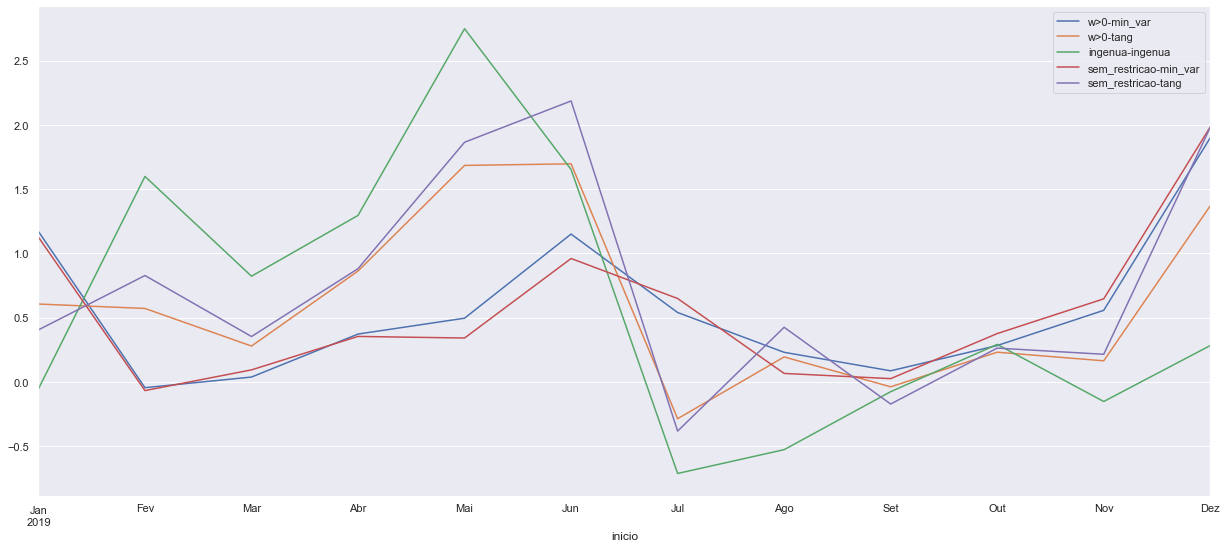

In [47]:
sns.set()
sim_stats.plot(figsize=(21,9))

<AxesSubplot:xlabel='inicio'>

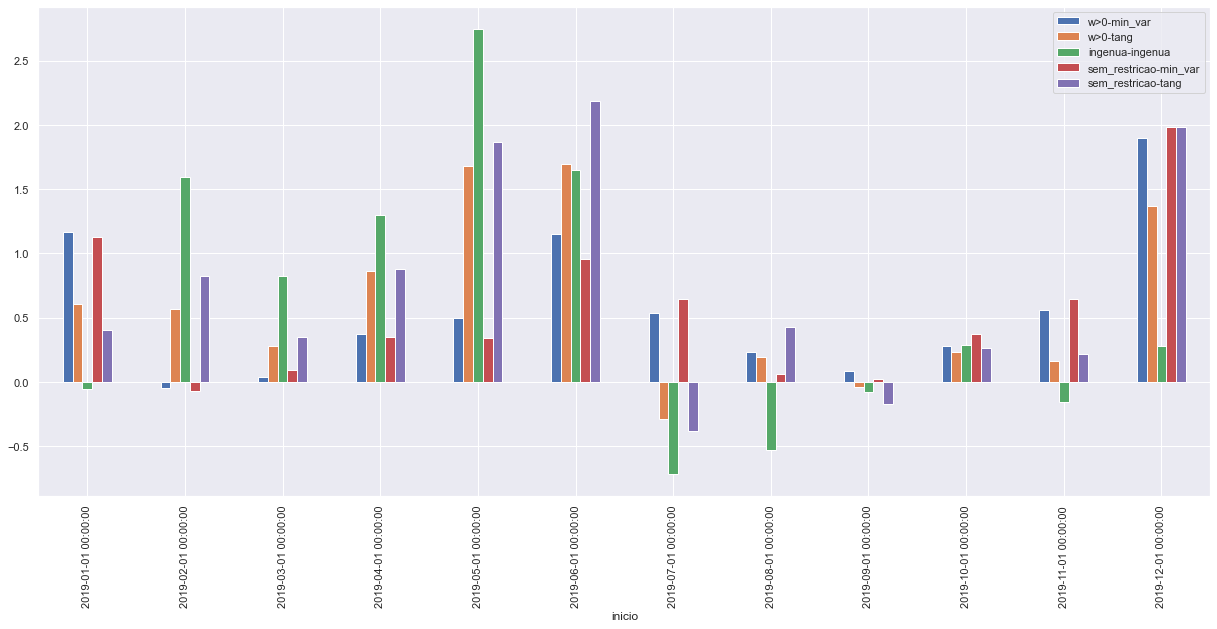

In [48]:
sim_stats.plot.bar(figsize=(21,9))

# Tabela de Retornos
Periodo Fora da Amostra

In [49]:
sim_stats

,w>0-min_var,w>0-tang,ingenua-ingenua,sem_restricao-min_var,sem_restricao-tang
inicio,,,,,
2019-01-01,1.170159,0.605989,-0.053696,1.125837,0.405041
2019-02-01,-0.044805,0.571636,1.598564,-0.067373,0.827767
2019-03-01,0.038099,0.279167,0.822360,0.093773,0.353282
2019-04-01,0.372404,0.862794,1.295500,0.353996,0.881072
2019-05-01,0.495725,1.684275,2.747907,0.341507,1.864476
2019-06-01,1.150175,1.696773,1.652349,0.960124,2.185821
2019-07-01,0.540090,-0.286028,-0.712076,0.649048,-0.382522
2019-08-01,0.230414,0.194517,-0.526949,0.066126,0.425128
2019-09-01,0.086503,-0.038161,-0.075923,0.025636,-0.171952


In [50]:
#Retorno Médio no periodo fora da amostra
sim_stats.mean()

w>0-min_var              0.564845
w>0-tang                 0.611376
ingenua-ingenua          0.597560
sem_restricao-min_var    0.546203
sem_restricao-tang       0.737258
dtype: float64

# Tabela de Volatilidade

In [51]:
sim_volatilidade

,w>0-min_var,w>0-tang,ingenua-ingenua,sem_restricao-min_var,sem_restricao-tang
inicio,,,,,
2019-01-01,0.127677,0.191046,0.283931,0.130689,0.250830
2019-02-01,0.149413,0.212431,0.391650,0.150832,0.242511
2019-03-01,0.194548,0.155554,0.128848,0.181976,0.154016
2019-04-01,0.120305,0.217005,0.372415,0.116080,0.266375
2019-05-01,0.163631,0.242912,0.365057,0.151347,0.303709
2019-06-01,0.122719,0.236235,0.344397,0.129198,0.283572
2019-07-01,0.150449,0.302812,0.424789,0.150759,0.359066
2019-08-01,0.220981,0.205207,0.258456,0.244775,0.238710
2019-09-01,0.116139,0.212148,0.348957,0.102868,0.264051


In [70]:
sim_volatilidade.mean()

w>0-min_var              0.145081
w>0-tang                 0.207177
ingenua-ingenua          0.308821
sem_restricao-min_var    0.144772
sem_restricao-tang       0.246127
dtype: float64

# Grafico de Volatilidade

<AxesSubplot:xlabel='inicio'>

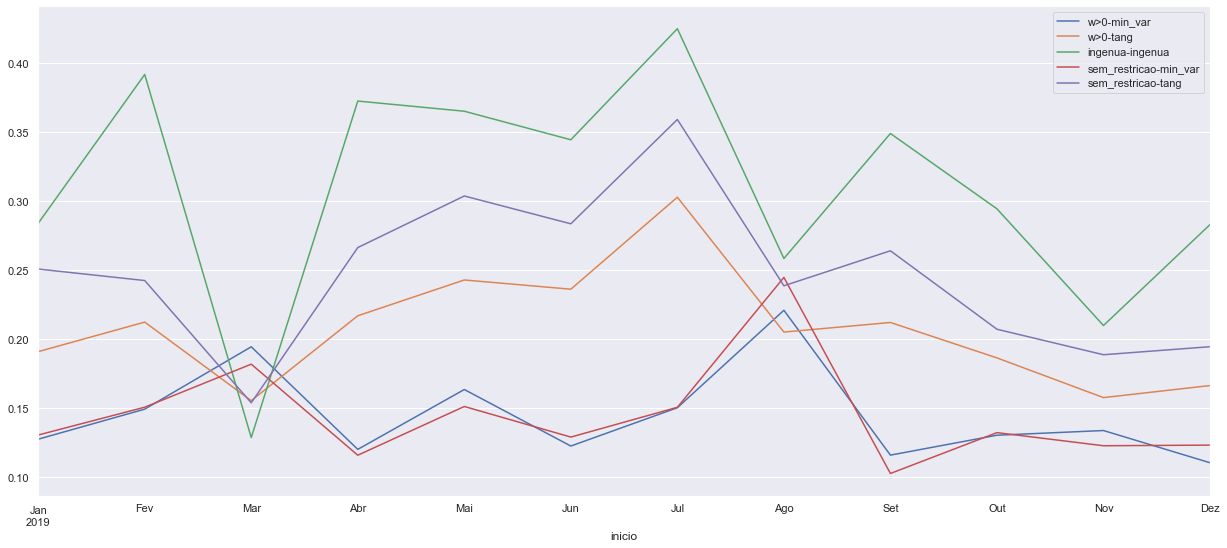

In [52]:
sns.set()
sim_volatilidade.plot(figsize=(21,9))

<AxesSubplot:xlabel='inicio'>

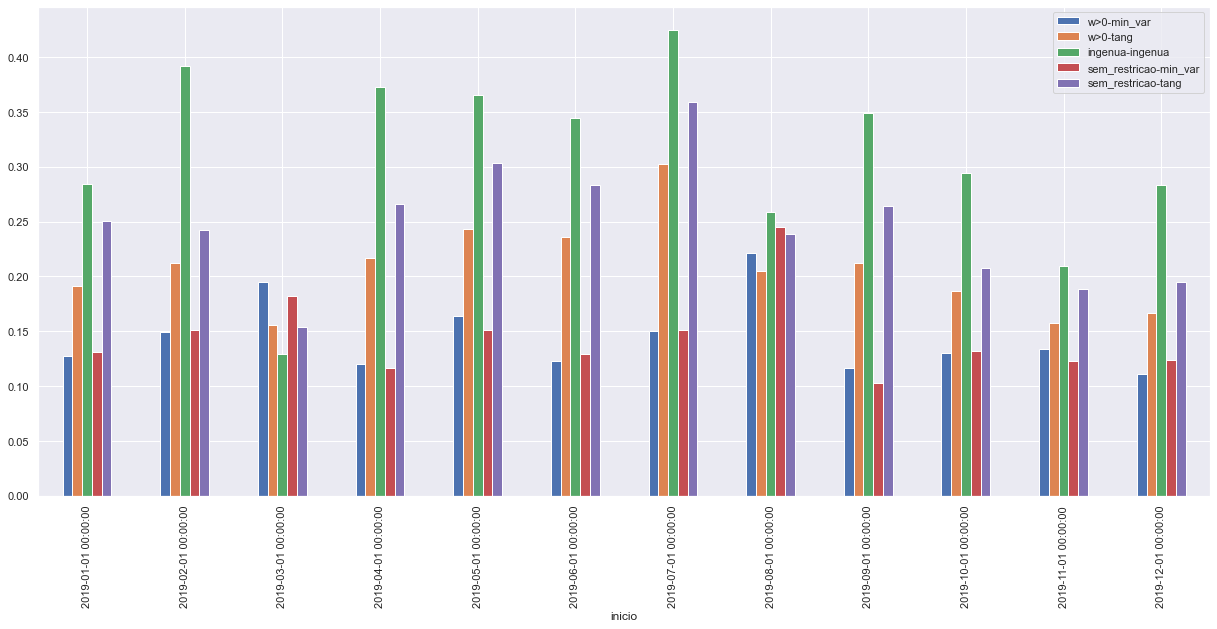

In [59]:
sns.set()
sim_volatilidade.plot.bar(figsize=(21,9))

# Grafico Sharpe

<AxesSubplot:xlabel='inicio'>

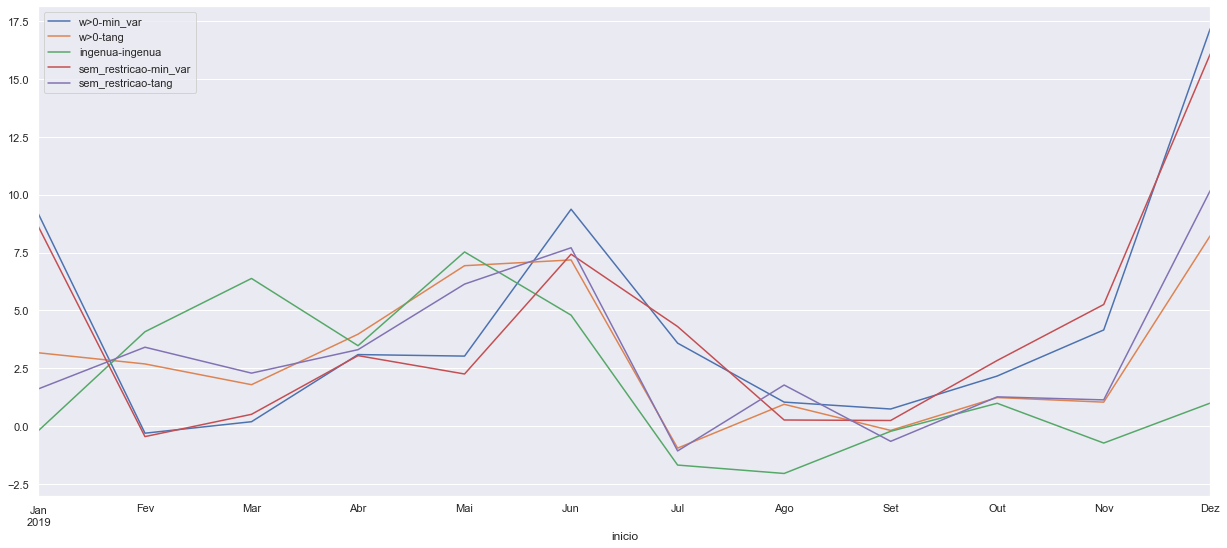

In [54]:
sns.set()
sim_stats_sharpe.plot(figsize=(21,9))

<AxesSubplot:xlabel='inicio'>

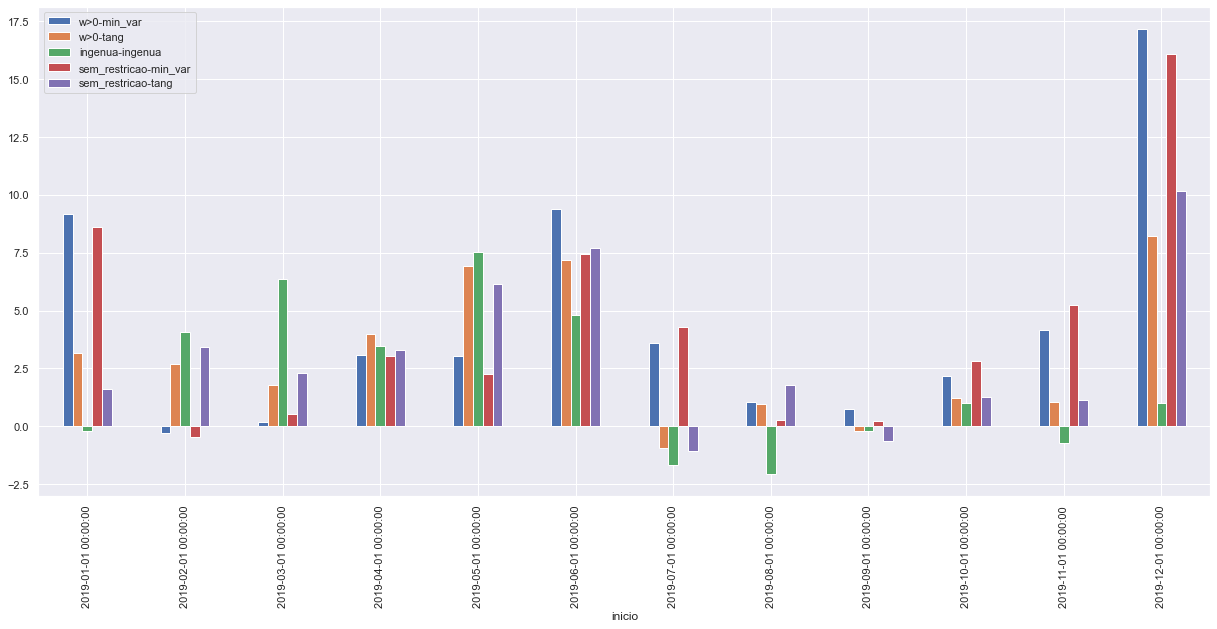

In [60]:
sns.set()
sim_stats_sharpe.plot.bar(figsize=(21,9))

# Tabela Sharpe

In [56]:
sim_stats_sharpe

,w>0-min_var,w>0-tang,ingenua-ingenua,sem_restricao-min_var,sem_restricao-tang
inicio,,,,,
2019-01-01,9.164970,3.171951,-0.189116,8.614629,1.614799
2019-02-01,-0.299875,2.690929,4.081615,-0.446677,3.413321
2019-03-01,0.195831,1.794659,6.382407,0.515304,2.293798
2019-04-01,3.095501,3.975911,3.478647,3.049577,3.307631
2019-05-01,3.029534,6.933687,7.527330,2.256444,6.139027
2019-06-01,9.372464,7.182572,4.797808,7.431418,7.708176
2019-07-01,3.589853,-0.944574,-1.676305,4.305210,-1.065324
2019-08-01,1.042686,0.947905,-2.038839,0.270148,1.780938
2019-09-01,0.744820,-0.179881,-0.217571,0.249218,-0.651205


In [ ]:
======= Testes ========

In [ ]:
print(UltimoDiaMes('2021-01-01'))

In [ ]:
a = UltimoDiaMes('2021-01-01')
b = UltimoDiaMes('2021-08-01')

In [ ]:
df = df[(df.index >= a) & (df.index <= b)]

In [ ]:



date = datetime.datetime(data.year,data.month,data.day)
nxt_mnth = date.replace(day=28) + datetime.timedelta(days=4)        
res = nxt_mnth - datetime.timedelta(days=nxt_mnth.day)

In [ ]:
df

In [ ]:
import datetime

# Data final
d2 = datetime.datetime.strptime('2017-05-05', '%Y-%m-%d')

# Data inicial
d1 = datetime.datetime.strptime('2017-05-01', '%Y-%m-%d')

In [ ]:
# Calculo da quantidade de dias
quantidade_dias = abs((d2 - d1).days)

In [ ]:
retorno_anual

In [ ]:
cov

In [200]:
ef = pt.EfficientFrontier(retorno_anual, cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('Industry_1', 0.41099), ('Industry_2', 0.0), ('Industry_3', 0.15595), ('Industry_4', 0.17474), ('Industry_5', 0.11494), ('Industry_6', 0.0), ('Industry_7', 0.14338)])
Expected annual return: 17.8%
Annual volatility: 23.3%
Sharpe Ratio: 0.68


(0.17818180023549784, 0.23336429641806097, 0.6778320534179861)

In [ ]:
ef = pt.EfficientFrontier(retorno_anual, cov,weight_bounds=(0,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

In [ ]:
#Exemplo que usei para criar e usar as funções e range de data

    

In [ ]:
for data in datas:
    data['inicio'],data['fim']

In [ ]:
pesos = [resultado['amostra']['w>0']['min_var'][i] for i in resultado['amostra']['w>0']['min_var']]

In [ ]:
retorno_pesos

In [ ]:
a = ret_pesos['w>0']['min_var']

In [ ]:
[a[i] for i in a]

In [ ]:

np.sqrt(np.dot(ret_pesos['ingenua'].T, np.dot(cov,pesos)))

In [ ]:
pesos

In [ ]:

np.sqrt(np.dot(np.asarray(pesos).T, np.dot(cov,pesos)))

In [ ]:
type(ret_pesos['ingenua'])

In [ ]:
type(pesos)

In [ ]:
pesos = np.asarray(pesos)

In [ ]:
ret_pesos

In [ ]:
ConvertDictArray(ret_pesos['w>0']['min_var'])

In [ ]:
type(lista)

In [ ]:
pp(resultado)

In [ ]:
pd.DataFrame(resultado['amostra']['sem_restricao'])

In [ ]:
RetornoPeriodoForaAmostra(df,'2021-03-01','2021-03-31', [0.25, 0.25, 0.25, 0.25])

In [ ]:
simulacoes = {}
for ret in resultado['amostra']:
    simulacoes.update({ret:{}})
    for cart in resultado['amostra'][ret]:
        pesos = resultado['amostra'][ret][cart]['pesos']
        simulacoes[ret].update({cart:{}})
        lista_simulacoes = list()
        print('Carteira:')
        for i in datas:
            ret_periodo = RetornoPeriodoForaAmostra(df,i['inicio'],i['fim'],pesos)
            ret_periodo.update(i)
            ret_periodo.update({'pesos_atuais':pesos})
            
            recalc_pesos = Carteiras(df,inicio, i['fim'])
            novos_pesos = recalc_pesos[ret][cart]['pesos']
            
            ret_periodo.update({'novos_pesos':novos_pesos})
            pesos = novos_pesos
            
            lista_simulacoes.append(ret_periodo)
            
        simulacoes[ret][cart].update({'valor':lista_simulacoes})
            #break
            
        #break
    #break

    

In [ ]:
for i in datas:
    print(RetornoPeriodoForaAmostra(df,i['inicio'],i['fim'],[0.25, 0.25, 0.25, 0.25]))

In [42]:
print(simulacoes['sem_restricao'].keys())

dict_keys(['min_var', 'tang'])


In [344]:
pd.DataFrame(simulacoes['w>0']['tang']['valor'])

,retorno_periodo,volatilidade,sharpe,inicio,fim,pesos_atuais,novos_pesos
0,0.640143,0.151634,4.221642,2019-01-01,2019-01-31,"[0.60864, 0.0, 0.0, 0.0, 0.28245, 0.0, 0.0, 0....","[0.59299, 0.0, 0.0, 0.0, 0.31117, 0.0, 0.0, 0...."
1,0.282632,0.155615,1.816225,2019-02-01,2019-02-28,"[0.59299, 0.0, 0.0, 0.0, 0.31117, 0.0, 0.0, 0....","[0.59409, 0.0, 0.0, 0.0, 0.30293, 0.0, 0.0, 0...."
2,0.158073,0.140737,1.123179,2019-03-01,2019-03-31,"[0.59409, 0.0, 0.0, 0.0, 0.30293, 0.0, 0.0, 0....","[0.57639, 0.0, 0.0, 0.0, 0.31154, 0.0, 0.0, 0...."
3,0.293840,0.125445,2.342392,2019-04-01,2019-04-30,"[0.57639, 0.0, 0.0, 0.0, 0.31154, 0.0, 0.0, 0....","[0.53957, 0.0, 0.0, 0.0, 0.33887, 0.0, 0.0, 0...."
4,0.440760,0.176630,2.495386,2019-05-01,2019-05-31,"[0.53957, 0.0, 0.0, 0.0, 0.33887, 0.0, 0.0, 0....","[0.47281, 0.0, 0.0, 0.0, 0.38004, 0.0, 0.0, 0...."
5,0.617426,0.162354,3.802948,2019-06-01,2019-06-30,"[0.47281, 0.0, 0.0, 0.0, 0.38004, 0.0, 0.0, 0....","[0.45391, 0.0, 0.0, 0.0, 0.39099, 0.0, 0.0, 0...."
6,-0.125535,0.211234,-0.594291,2019-07-01,2019-07-31,"[0.45391, 0.0, 0.0, 0.0, 0.39099, 0.0, 0.0, 0....","[0.44798, 0.0, 0.0, 0.0, 0.40857, 0.0, 0.0, 0...."
7,-0.321979,0.188685,-1.706442,2019-08-01,2019-08-31,"[0.44798, 0.0, 0.0, 0.0, 0.40857, 0.0, 0.0, 0....","[0.37637, 0.0, 0.0, 0.0, 0.46713, 0.0, 0.0, 0...."
8,0.135463,0.140837,0.961842,2019-09-01,2019-09-30,"[0.37637, 0.0, 0.0, 0.0, 0.46713, 0.0, 0.0, 0....","[0.40435, 0.0, 0.0, 0.0, 0.44801, 0.0, 0.0, 0...."
9,0.088186,0.198335,0.444630,2019-10-01,2019-10-31,"[0.40435, 0.0, 0.0, 0.0, 0.44801, 0.0, 0.0, 0....","[0.38066, 0.0, 0.0, 0.0, 0.46535, 0.0, 0.0, 0...."


In [44]:
pd.DataFrame(simulacoes['ingenua']['ingenua']['valor'])

,retorno_periodo,volatilidade,sharpe,inicio,fim,pesos_atuais,novos_pesos
0,1.461331,0.142276,10.271111,2019-01-01,2019-01-31,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
1,-0.193585,0.156312,-1.238454,2019-02-01,2019-02-28,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
2,-0.134353,0.235638,-0.570164,2019-03-01,2019-03-31,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
3,0.169700,0.130379,1.301585,2019-04-01,2019-04-30,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
4,0.158851,0.190879,0.832211,2019-05-01,2019-05-31,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
5,0.896585,0.124233,7.216936,2019-06-01,2019-06-30,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
6,0.624649,0.133604,4.675365,2019-07-01,2019-07-31,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
7,0.350083,0.246292,1.421415,2019-08-01,2019-08-31,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
8,0.242578,0.127174,1.907445,2019-09-01,2019-09-30,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"
9,0.178375,0.139127,1.282100,2019-10-01,2019-10-31,"[0.25, 0.25, 0.25, 0.25]","[0.25, 0.25, 0.25, 0.25]"


In [45]:
pd.DataFrame(simulacoes['sem_restricao']['tang']['valor'])

,retorno_periodo,volatilidade,sharpe,inicio,fim,pesos_atuais,novos_pesos
0,1.448542,0.154701,9.363504,2019-01-01,2019-01-31,"[-0.1542, 0.34283, -0.18863, 1.0]","[-0.14931, 0.32728, -0.16919, 0.99122]"
1,-0.120164,0.136347,-0.881311,2019-02-01,2019-02-28,"[-0.14931, 0.32728, -0.16919, 0.99122]","[-0.14954, 0.33298, -0.17971, 0.99627]"
2,-0.094540,0.192570,-0.490938,2019-03-01,2019-03-31,"[-0.14954, 0.33298, -0.17971, 0.99627]","[-0.15556, 0.34601, -0.18473, 0.99427]"
3,0.134829,0.122149,1.103810,2019-04-01,2019-04-30,"[-0.15556, 0.34601, -0.18473, 0.99427]","[-0.15637, 0.33641, -0.17207, 0.99203]"
4,-0.339745,0.166958,-2.034917,2019-05-01,2019-05-31,"[-0.15637, 0.33641, -0.17207, 0.99203]","[-0.14995, 0.32201, -0.14681, 0.97475]"
5,0.800872,0.098694,8.114726,2019-06-01,2019-06-30,"[-0.14995, 0.32201, -0.14681, 0.97475]","[-0.14109, 0.35606, -0.17979, 0.96482]"
6,0.557937,0.117034,4.767321,2019-07-01,2019-07-31,"[-0.14109, 0.35606, -0.17979, 0.96482]","[-0.14805, 0.38173, -0.17937, 0.94569]"
7,0.577616,0.240297,2.403761,2019-08-01,2019-08-31,"[-0.14805, 0.38173, -0.17937, 0.94569]","[-0.13435, 0.37889, -0.21051, 0.96598]"
8,-0.103873,0.132355,-0.784807,2019-09-01,2019-09-30,"[-0.13435, 0.37889, -0.21051, 0.96598]","[-0.12957, 0.368, -0.1922, 0.95377]"
9,0.510829,0.119328,4.280876,2019-10-01,2019-10-31,"[-0.12957, 0.368, -0.1922, 0.95377]","[-0.13787, 0.37712, -0.20044, 0.96118]"
